In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from statsmodels.formula.api import ols

plt.rcParams['figure.figsize'] = [16, 12]

In [51]:
df = pd.read_csv('Dane_bank_nowe.csv', sep=',')

In [45]:
df.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,886607.90,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,916554.56,0
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,849781.25,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,1367384.50,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,1504164.20,0


In [46]:
df.isnull().values.sum()

0

In [52]:
df = df.drop('CustomerId', axis=1)
df = df.drop('Surname', axis=1)
df = df.drop('RowNumber', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [53]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,1.130141e+06,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,3.078528e+05,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.914779e+05,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,8.728450e+05,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,1.160135e+06,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,1.363969e+06,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.730501e+06,1.000000


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
d = {'Male': 1, 'Female': 2}
df['Gender'] = df['Gender'].map(d)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,886607.90,1
1,608,2,2,41,1,83807.86,1,0,1,916554.56,0
2,502,1,2,42,8,159660.80,3,1,0,849781.25,1
3,699,1,2,39,1,0.00,2,0,0,1367384.50,0
4,850,2,2,43,2,125510.82,1,1,1,1504164.20,0
5,645,2,1,44,8,113755.78,2,1,0,1407073.60,1
6,822,1,1,50,7,0.00,2,1,1,1553610.60,0
7,376,3,2,29,4,115046.74,4,1,0,655831.10,1
8,501,1,1,44,4,142051.07,2,0,1,678443.60,0
9,684,1,1,27,2,134603.88,1,1,1,1085464.10,0


In [55]:
e = {'France': 1, 'Spain':2, 'Germany':3}
df['Geography'] = df['Geography'].map(e)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,Female,42,2,0.00,1,1,1,886607.90,1
1,608,2,Female,41,1,83807.86,1,0,1,916554.56,0
2,502,1,Female,42,8,159660.80,3,1,0,849781.25,1
3,699,1,Female,39,1,0.00,2,0,0,1367384.50,0
4,850,2,Female,43,2,125510.82,1,1,1,1504164.20,0
5,645,2,Male,44,8,113755.78,2,1,0,1407073.60,1
6,822,1,Male,50,7,0.00,2,1,1,1553610.60,0
7,376,3,Female,29,4,115046.74,4,1,0,655831.10,1
8,501,1,Male,44,4,142051.07,2,0,1,678443.60,0
9,684,1,Male,27,2,134603.88,1,1,1,1085464.10,0


In [37]:
mul_lin_regress = ols("Exited ~ CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember", df).fit()
print(mul_lin_regress.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3006      0.035     -8.681      0.000      -0.368      -0.233
CreditScore    -9.509e-05   3.85e-05     -2.468      0.014      -0.000   -1.96e-05
Geography          0.0551      0.005     11.445      0.000       0.046       0.065
Gender             0.0758      0.007     10.122      0.000       0.061       0.090
Age                0.0111      0.000     31.164      0.000       0.010       0.012
Tenure            -0.0019      0.001     -1.484      0.138      -0.004       0.001
Balance         4.151e-07   6.72e-08      6.172      0.000    2.83e-07    5.47e-07
NumOfProducts     -0.0128      0.007     -1.898      0.058      -0.026       0.000
HasCrCard         -0.0040      0.008     -0.493      0.622      -0.020       0.012
IsActiveMember    -0.1421      0.007    -18.991      0.000      -0.157      -0.127


In [16]:
df = df.drop('RowNumber', axis=1)
# Gender False is Female
# Gender True is Male

In [29]:
df = df.drop('EstimatedSalary', axis=1)

In [17]:
df.Geography.unique()

array([1, 2, 3], dtype=int64)

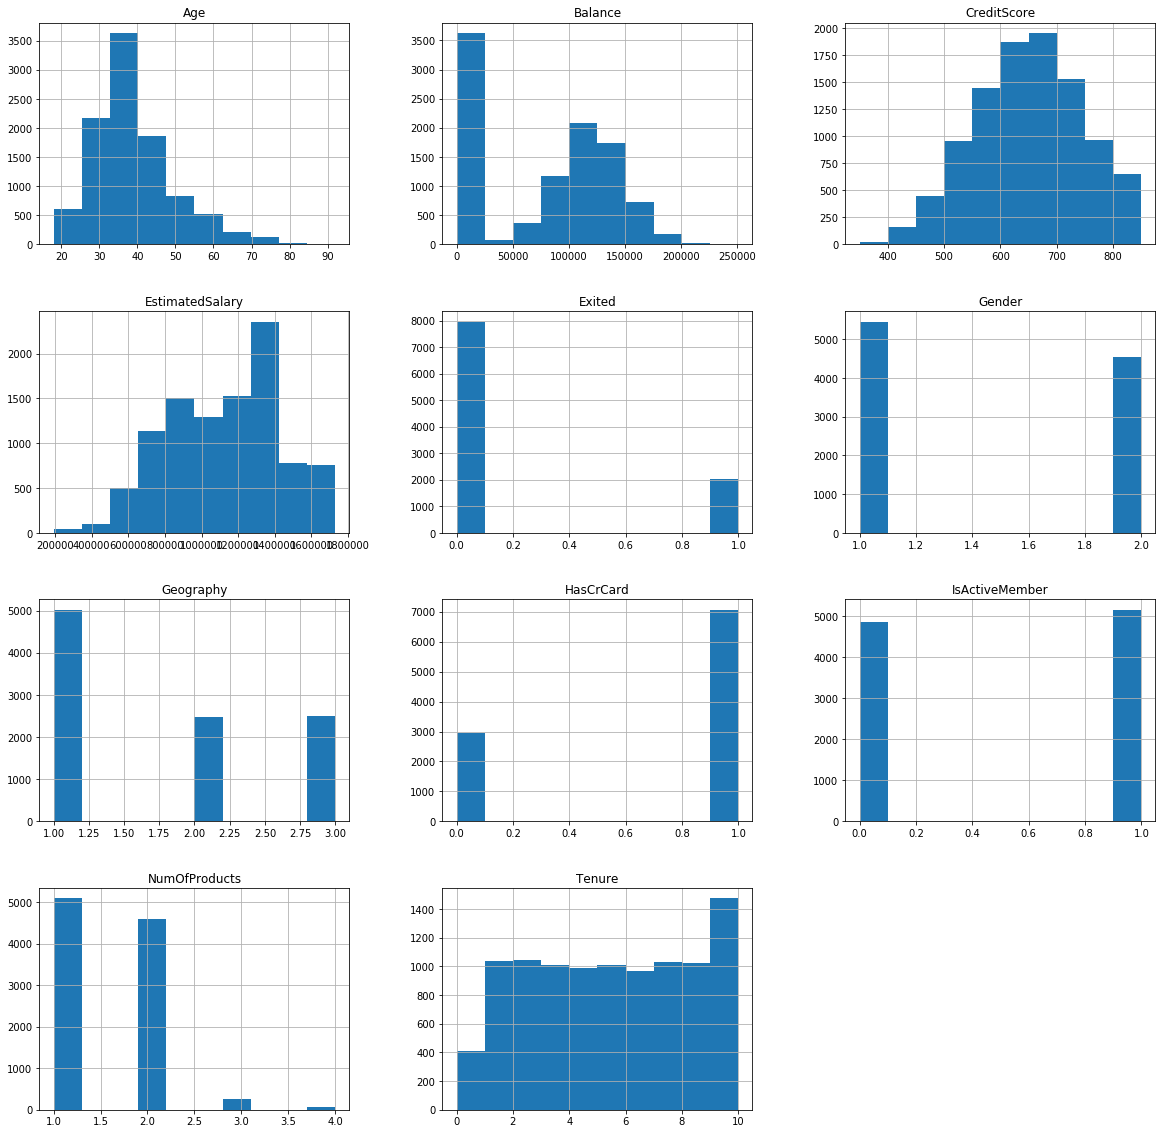

In [57]:
p=df.hist(figsize = (20,20))

In [28]:
?sns.pairplot

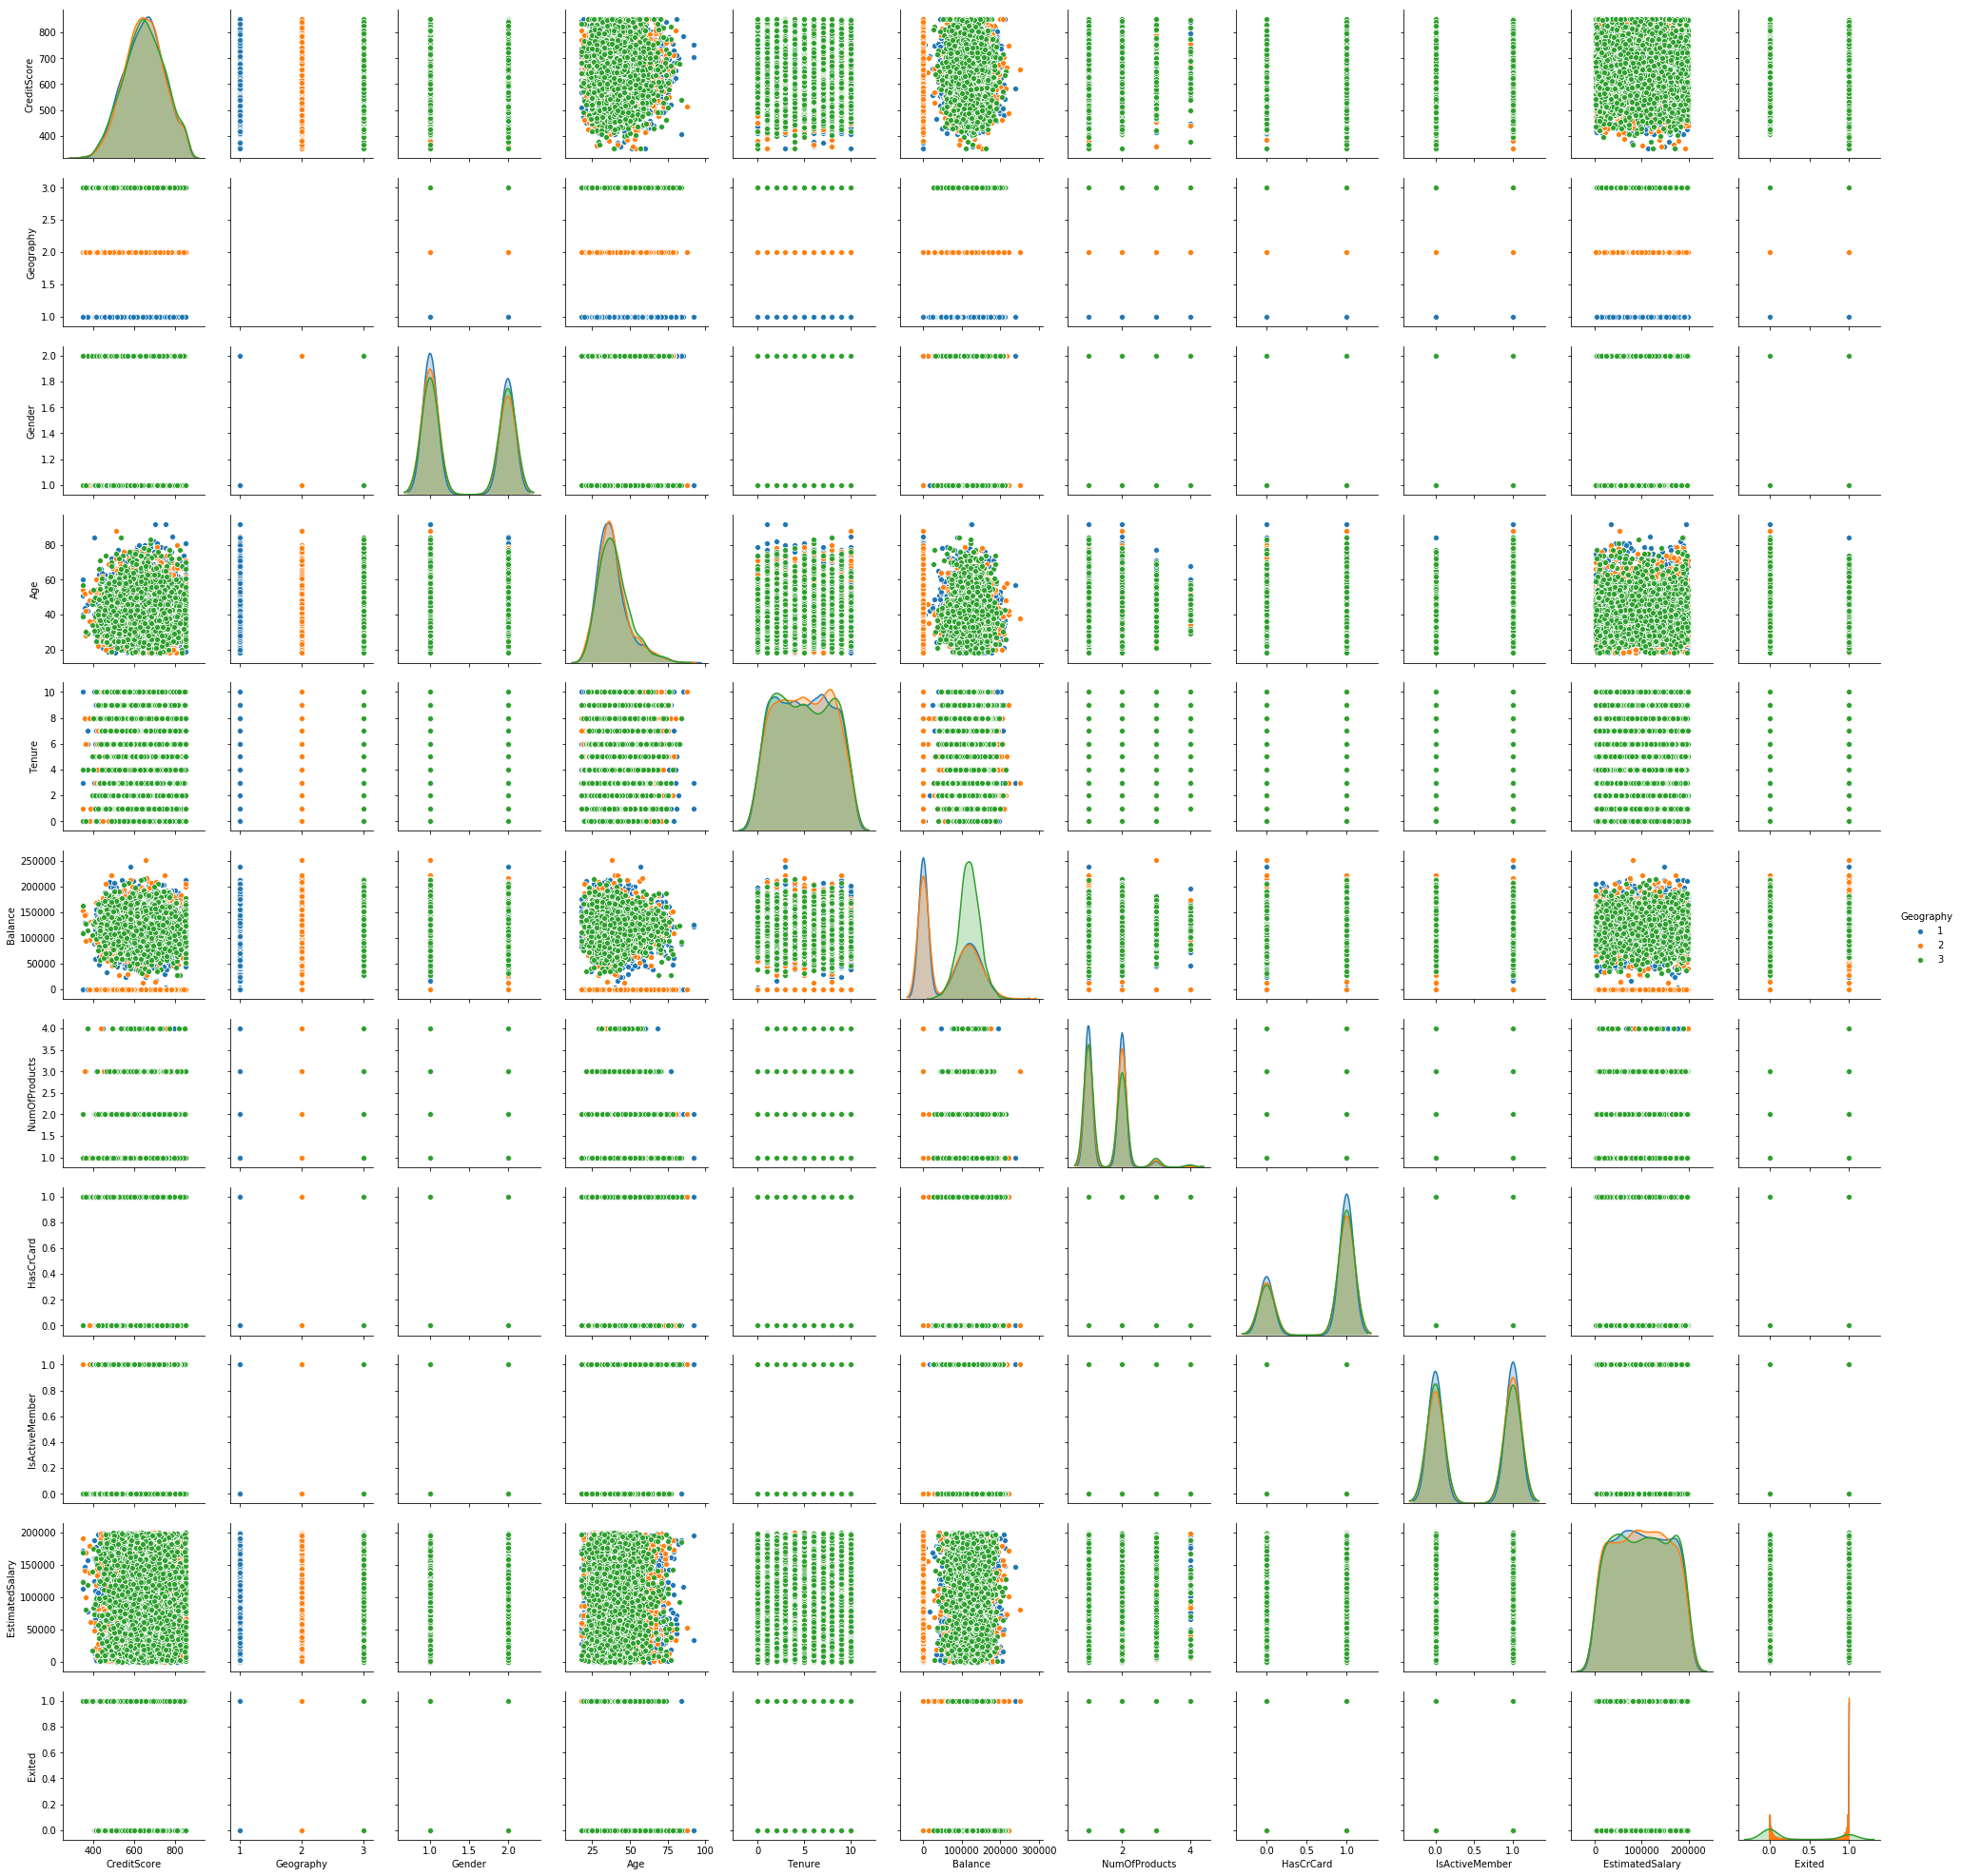

In [60]:
q=sns.pairplot(df, hue = 'Geography')

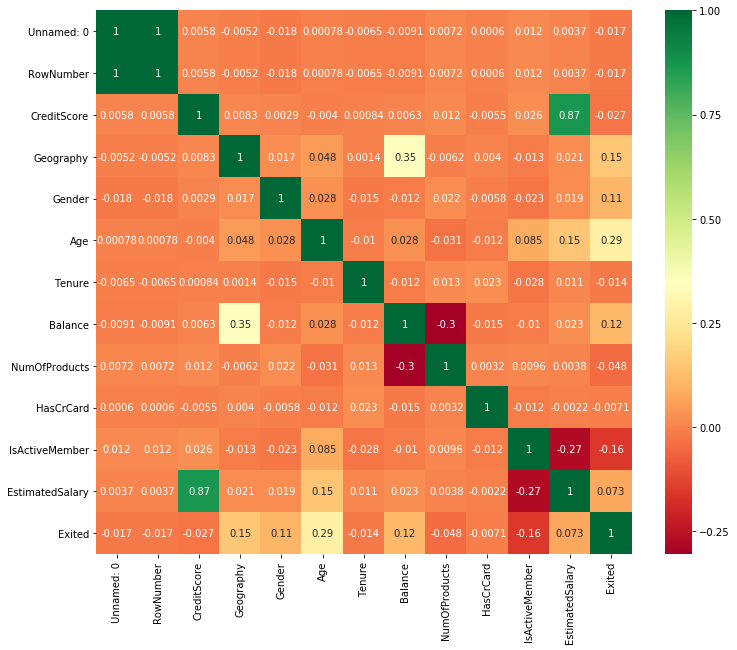

In [21]:
plt.figure(figsize=(12,10)) #rozmiar klocka2,10)) #rozmiar klocka
p=sns.heatmap(df1.corr(), annot=True,cmap ='RdYlGn') 

In [ ]:
balance x geography x number of products
exited x geography x gender x age x balance x is active member
age x is active member

AGE --> ISACTIVEMEMBER --> GEOGRAPHY --> BALANCE --> GENDER

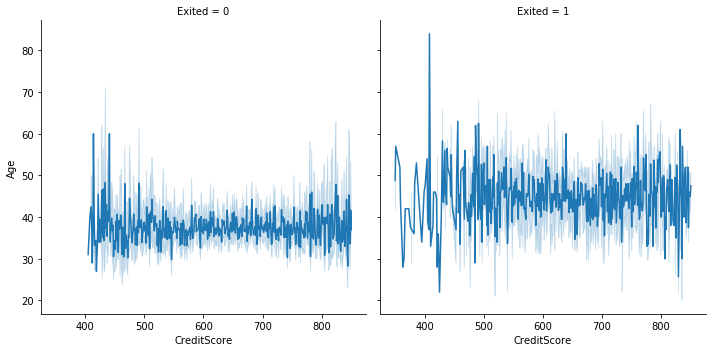

In [110]:
az1 = sns.relplot(x='CreditScore', y='Age',col="Exited",kind="line", data=df)

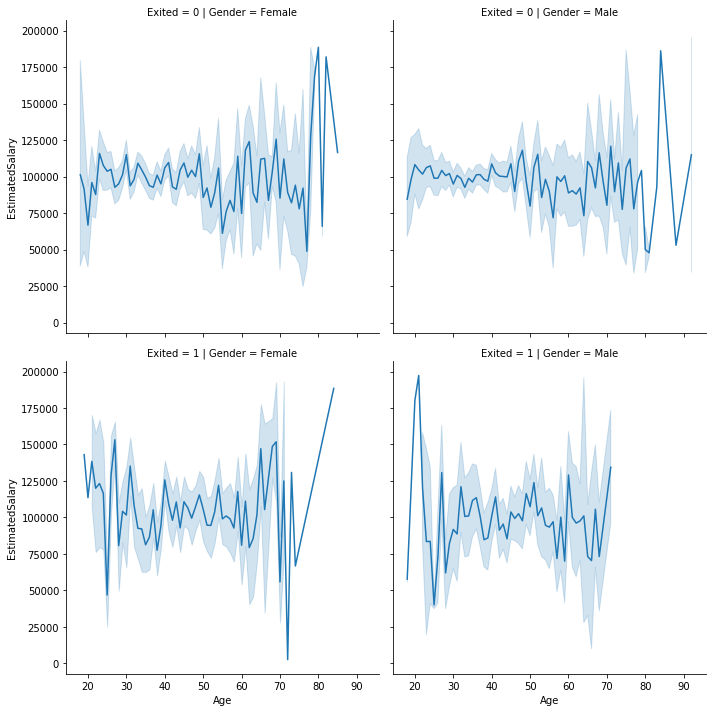

In [23]:
ax = sns.relplot(x='Age', y='EstimatedSalary',col="Gender", row='Exited', kind="line", data=df)

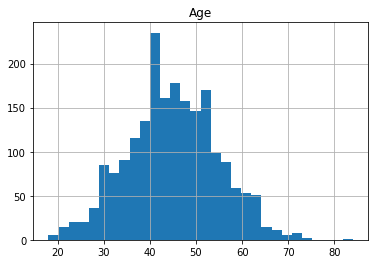

In [58]:
qq = df1.hist("Age", bins=30)

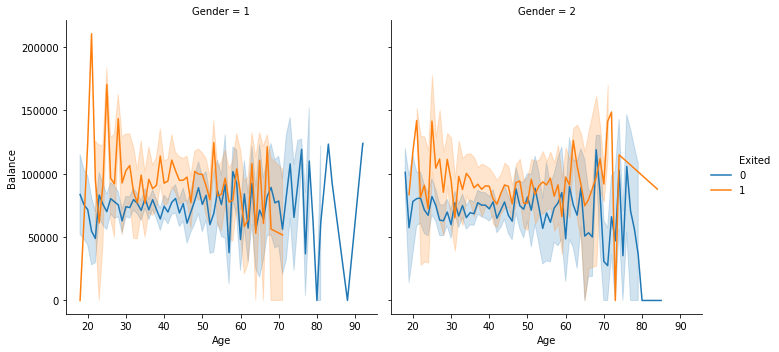

In [77]:
ax = sns.relplot(x='Age', y='Balance',hue='Exited', col='Gender', kind="line", data=df)

# ANALIZA SAMYCH KLIENTÓW KTÓRZY ODESZLI

In [33]:
df1 = pd.read_csv('Dane_bank_nowe.csv', index_col ="Exited")

In [34]:
df1 = df1.drop('CustomerId', axis=1)
df1 = df1.drop('Surname', axis=1)

d = {'Male': 1, 'Female': 2}
df1['Gender'] = df1['Gender'].map(d)

e = {'France': 1, 'Spain':2, 'Germany':3}
df1['Geography'] = df1['Geography'].map(e)


In [35]:
df1 = df1.drop('RowNumber', axis=1)
df1 = df1.drop('Unnamed: 0', axis=1)

In [36]:
df1.drop([0], inplace = True)

In [37]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
1,619,1,2,42,2,0.00,1,1,1,886607.90
1,502,1,2,42,8,159660.80,3,1,0,849781.25
1,645,2,1,44,8,113755.78,2,1,0,1407073.60
1,376,3,2,29,4,115046.74,4,1,0,655831.10
1,653,3,1,58,1,132602.88,1,1,0,1475678.10


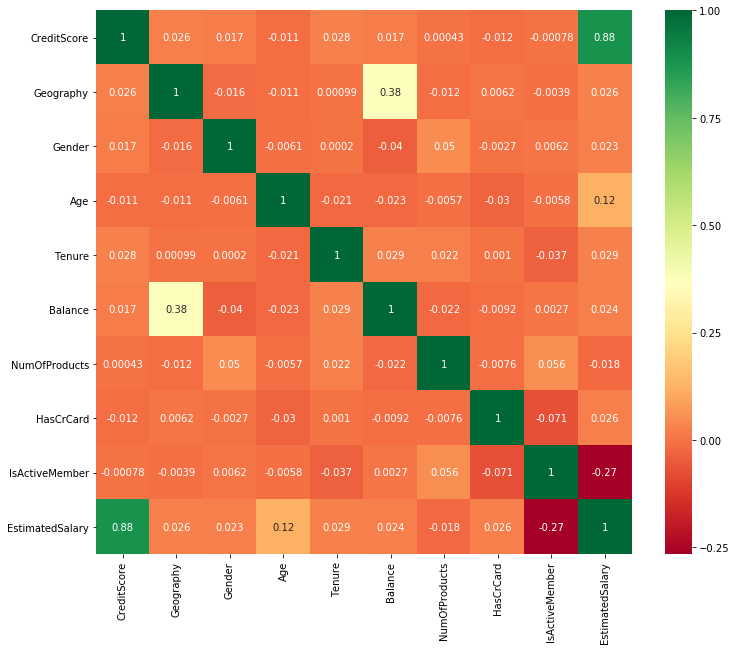

In [51]:
plt.figure(figsize=(12,10)) #rozmiar klocka2,10)) #rozmiar klocka
p=sns.heatmap(df1.corr(), annot=True,cmap ='RdYlGn') 

C:\Users\48500\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\48500\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


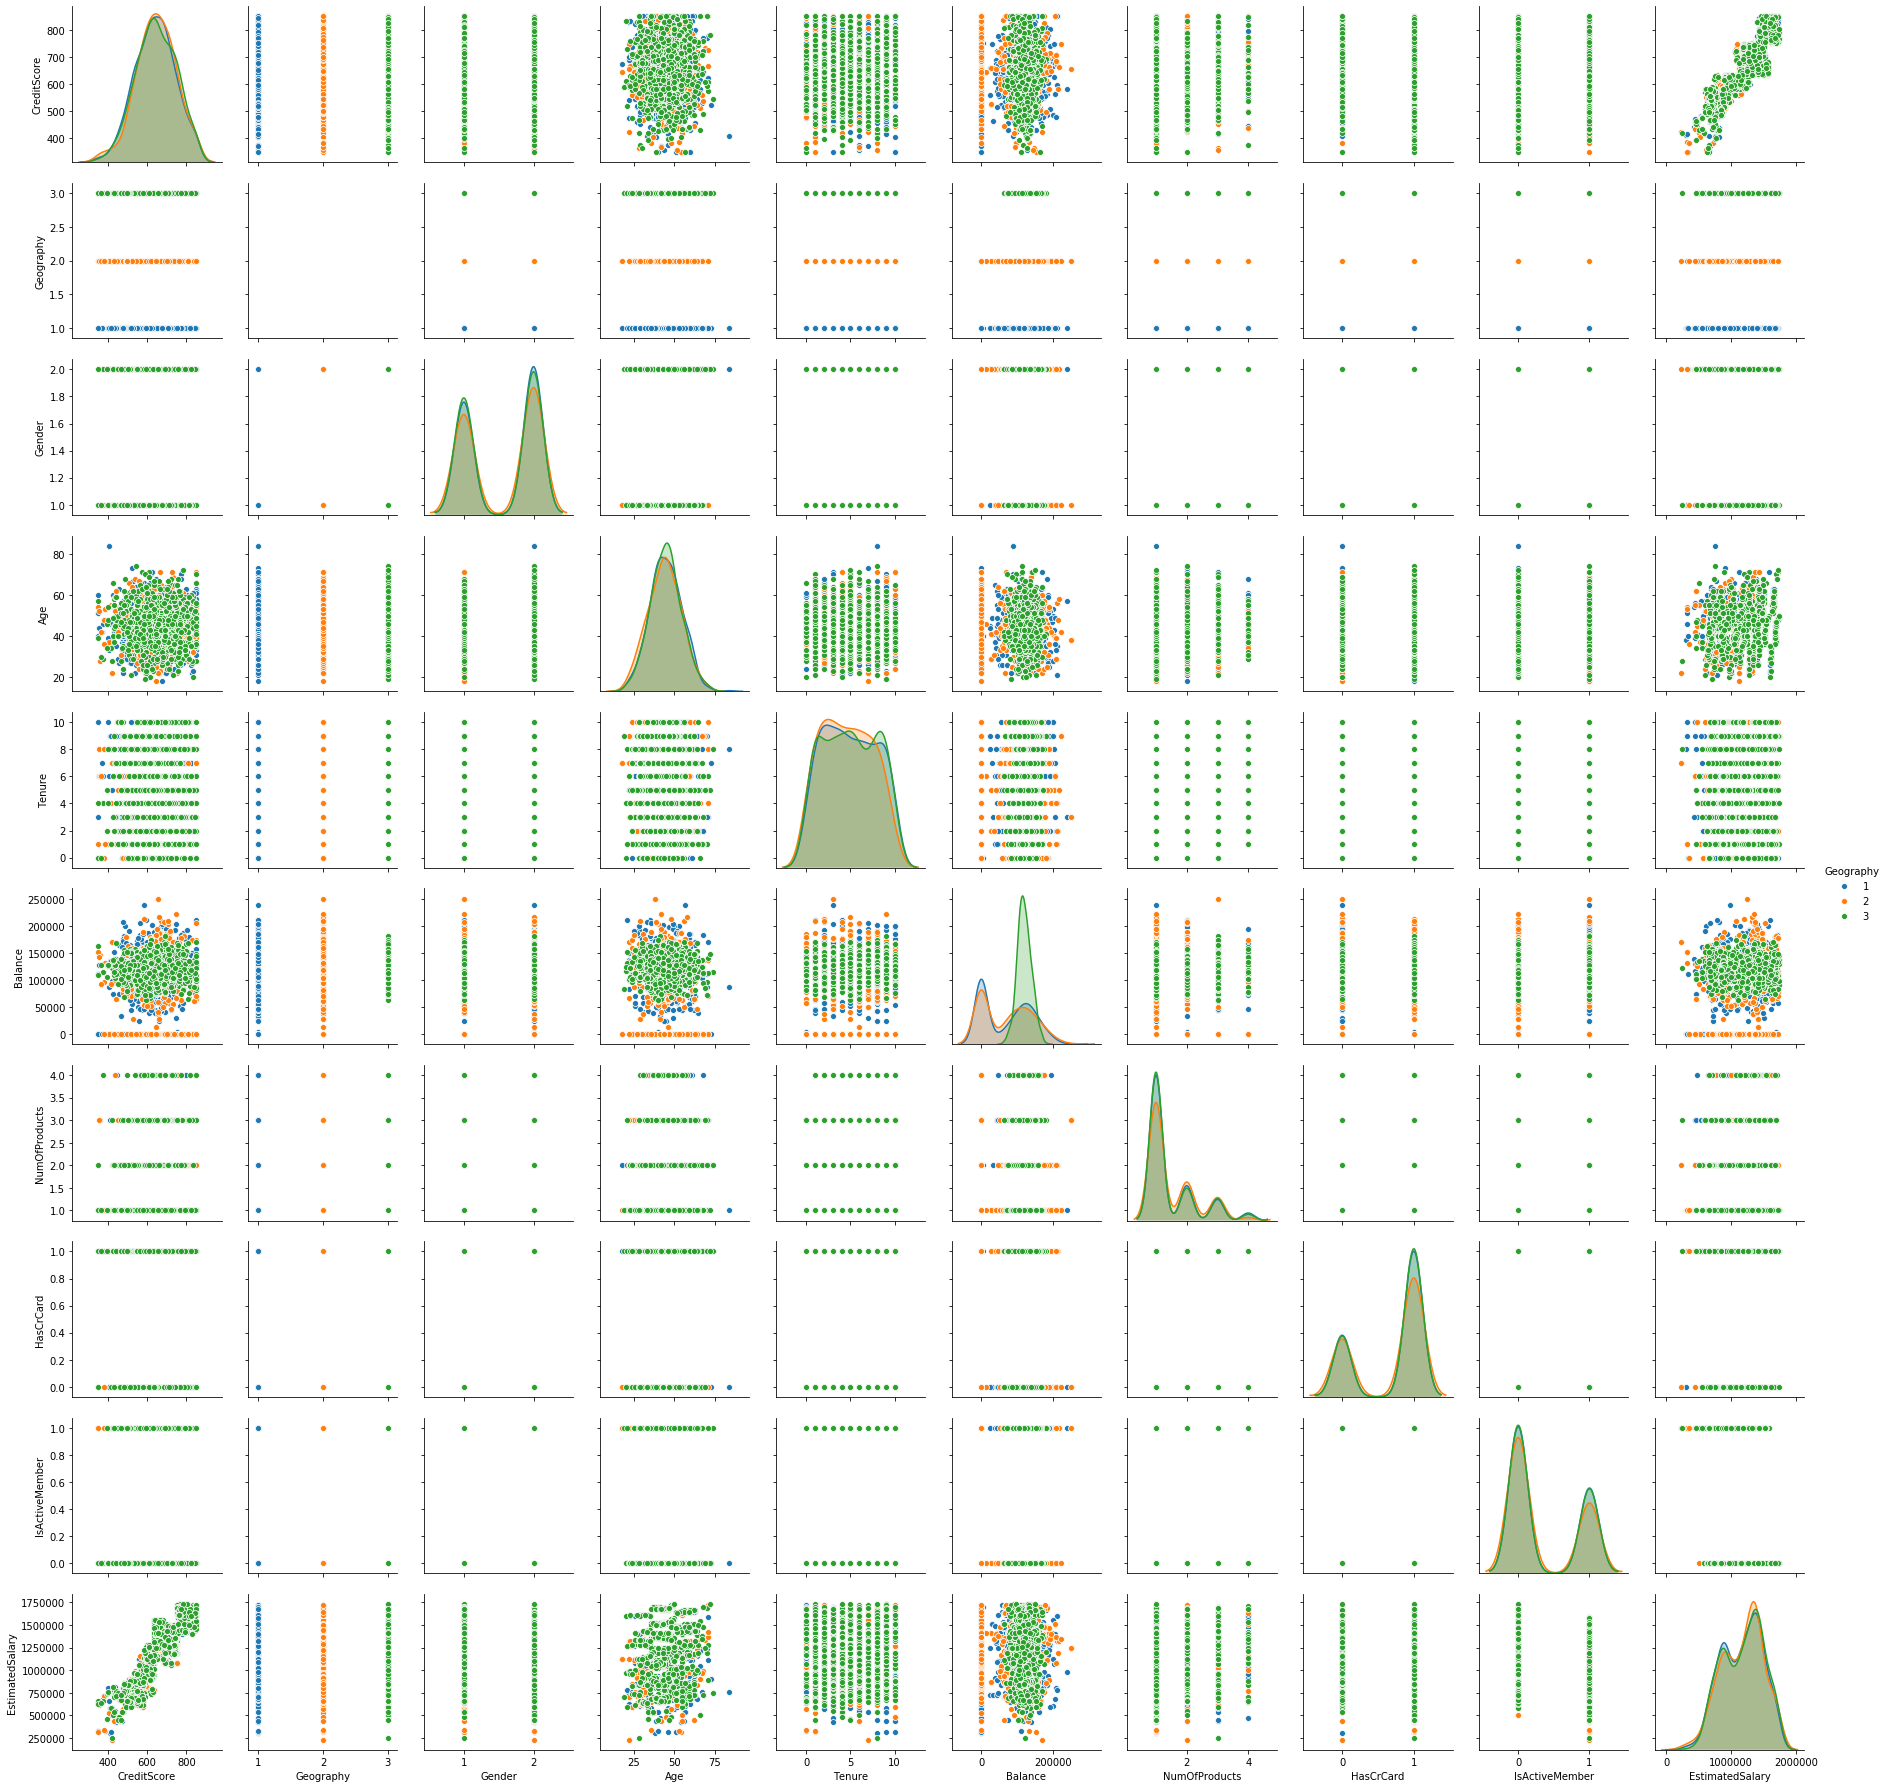

In [53]:
q=sns.pairplot(df1, hue = 'Geography')

In [79]:
df1[['Geography', 'Balance']].groupby(['Geography'], as_index=False).median().sort_values(by='Balance', ascending=False)

,Geography,Balance
2,3,118951.22
0,1,80376.46
1,2,79035.95


In [80]:
df1[['Geography', 'Balance']].groupby(['Geography'], as_index=False).mean().sort_values(by='Balance', ascending=False)

,Geography,Balance
2,3,120361.075590
1,2,72513.352446
0,1,71192.795728


In [ ]:
aa = sns.

In [58]:
df1[['Geography', 'CreditScore']].groupby(['Geography'], as_index=False).median().sort_values(by='CreditScore', ascending=False)

,Geography,CreditScore
1,2,649.0
2,3,646.0
0,1,643.5


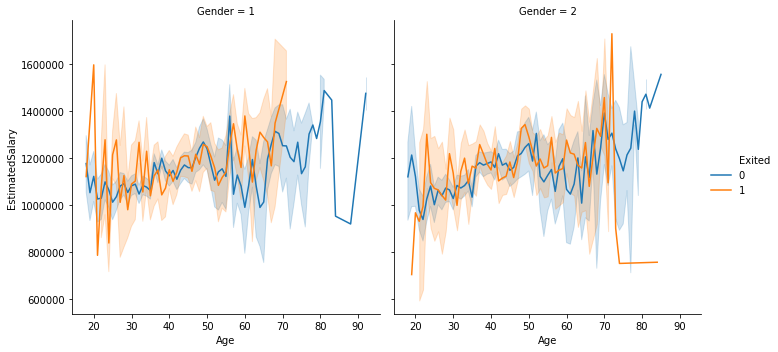

In [78]:
ax = sns.relplot(x='Age', y='EstimatedSalary',col="Gender",kind="line", hue='Exited', data=df)
# 1=male, 2=female

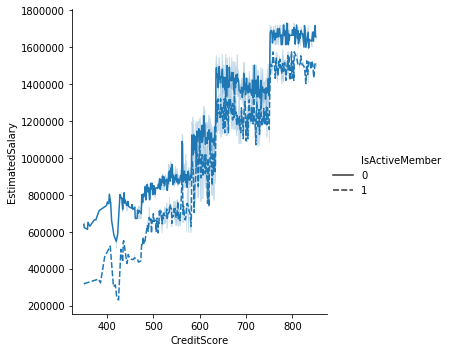

In [95]:
az = sns.relplot(x='CreditScore', y='EstimatedSalary',style="IsActiveMember",kind="line", data=df1)

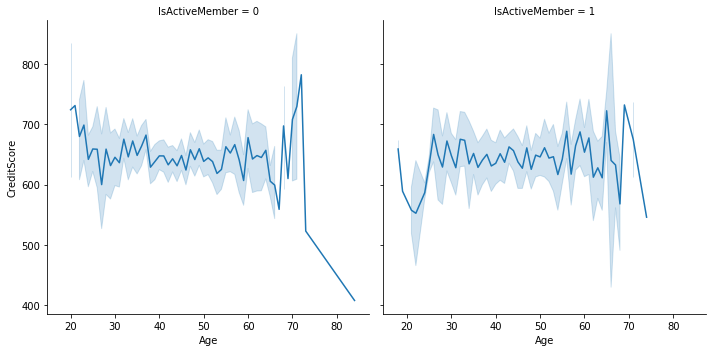

In [11]:
azz = sns.relplot(x='Age', y='CreditScore', col='IsActiveMember', kind="line", data=df1)

In [66]:
sns.subplot(dd,qq)

AttributeError: module 'seaborn' has no attribute 'subplot'

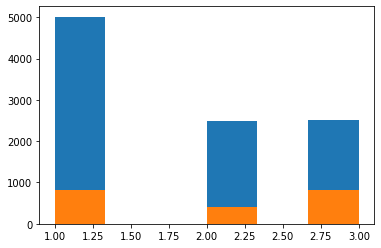

In [76]:
qq = plt.hist(x= "Geography", bins=6, data=df)
dd = plt.hist(x= "Geography", bins = 6, data=df1 )
plt.show()

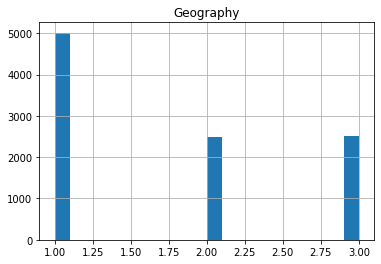

In [63]:
dd = df.hist("Geography", bins = 20)

In [68]:
import matplotlib.pyplot as plt

In [72]:
plt.hist?